In [3]:
import cv2
import PIL

In [6]:
# install dependencies: 
import torch, torchvision
import xmltodict
from os import listdir
from tqdm.notebook import tqdm
from detectron2.engine import DefaultTrainer

print(torch.__version__, torch.cuda.is_available())
!gcc --version

1.7.1 True
gcc (Ubuntu 5.4.0-6ubuntu1~16.04.12) 5.4.0 20160609
Copyright (C) 2015 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [1]:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from detectron2.structures import BoxMode

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 



In [3]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file("data/All_X152.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.75 # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = "data/model_detectronV2.pth"
predictor = DefaultPredictor(cfg)

In [126]:
#!wget https://i.pinimg.com/originals/bd/a3/d4/bda3d4bf11b0f727db1f9d81faac1b5d.jpg -q -O input.jpg
im = cv2.imread("./00064.PNG")

In [135]:
im.shape

(559, 722, 3)

In [136]:
im1.shape

(670, 866, 3)

In [127]:
outputs = predictor(im)

In [128]:
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([0], device='cuda:0')
Boxes(tensor([[ 49.9332, 113.2177, 623.3975, 305.3179]], device='cuda:0'))


In [137]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
im1=out.get_image()[:, :, ::-1]
cv2.imwrite("neham.png",im1) 

True

In [138]:
a=list(outputs["instances"].pred_boxes.to("cpu"))

In [139]:
a=a[0].numpy()
a

array([ 49.933186, 113.21773 , 623.3975  , 305.3179  ], dtype=float32)

In [140]:
xmin=int(a[0])
ymin=int(a[1])
xmax=int(a[2])+1
ymax=int(a[3])+1

In [132]:
ymax

306

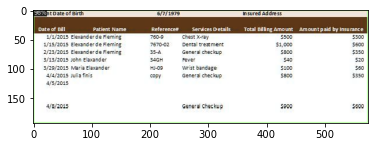

In [143]:
imgplot = plt.imshow(new_img)

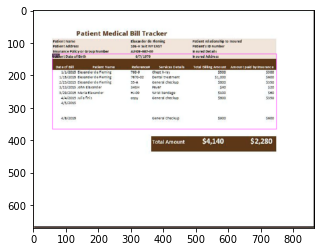

In [134]:
import matplotlib.pyplot as plt
imgplot = plt.imshow(im1)

In [142]:
new_img=im1[ymin:ymax,xmin:xmax]

In [121]:
from PIL import Image
img = Image.open("neham.png")
img2 = img.crop((xmin,ymin, xmax, ymax))
img2.save("output.png")

In [ ]:
l=listdir("drive/MyDrive/Subex Hackathon Dataset/labels")
l=l[:300]

In [114]:
cv2.imwrite("output.png",new_img) 

True

In [ ]:
def subex_dataset():
  dataset_dicts=[]
  for i in tqdm(l):
    xml_path="drive/MyDrive/Subex Hackathon Dataset/labels/"+i
    count=0
    image_data={}
    with open(xml_path) as xml_file: 
      data_dict = xmltodict.parse(xml_file.read()) 
      temp=data_dict["annotation"]
      image_data["file_name"]=f"drive/MyDrive/Subex Hackathon Dataset/images/{i[:5]}.PNG"
      image = PIL.Image.open(image_data["file_name"])
      width, height = image.size
      image_data["height"]=height
      image_data["width"]=width
      image_data["image_id"]=count
      objs=[]
      if isinstance(temp["object"], list): 
        for i in temp["object"]:
          obj={"bbox":[int(i["bndbox"]["xmin"]),int(i["bndbox"]["ymin"]),int(i["bndbox"]["xmax"]),int(i["bndbox"]["ymax"])],"bbox_mode":BoxMode.XYXY_ABS,"category_id":0}
        objs.append(obj)
      else:
        i=temp["object"]
        objs=[{"bbox":[int(i["bndbox"]["xmin"]),int(i["bndbox"]["ymin"]),int(i["bndbox"]["xmax"]),int(i["bndbox"]["ymax"])],"bbox_mode":BoxMode.XYXY_ABS,"category_id":0}]
    image_data["annotations"] = objs
    xml_file.close()
    count+=1
    dataset_dicts.append(image_data)
  return dataset_dicts

In [ ]:
a=subex_dataset()

In [ ]:
DatasetCatalog.register("subex_data", subex_dataset)
MetadataCatalog.get("subex_data").set(thing_classes=["tables"])
subex_meta = MetadataCatalog.get("subex_data")

In [ ]:
draw=random.sample(a, 1)[0]
draw

{'annotations': [{'bbox': [5, 73, 192, 157],
   'bbox_mode': <BoxMode.XYXY_ABS: 0>,
   'category_id': 0}],
 'file_name': 'drive/MyDrive/Subex Hackathon Dataset/images/00264.PNG',
 'height': 255,
 'image_id': 0,
 'width': 197}

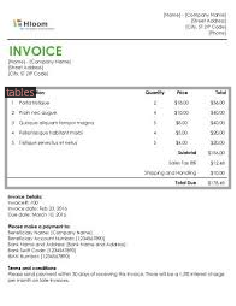

In [ ]:
img = cv2.imread(draw["file_name"])
visualizer = Visualizer(img[:, :, ::-1], metadata=subex_meta, scale=1.2)
out = visualizer.draw_dataset_dict(draw)
cv2_imshow(out.get_image()[:, :, ::-1])

In [ ]:
cfg = get_cfg()
cfg.merge_from_file("/content/drive/MyDrive/Subex_Final/All_X152.yaml")
cfg.DATASETS.TRAIN = ("subex_data",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = "/content/drive/MyDrive/Subex_Final/model_final.pth"
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.0005  # pick a good LR
cfg.SOLVER.MAX_ITER = 300    # 300 iterations seems good enough for this toy dataset; you will need to train longer for a practical dataset
cfg.SOLVER.STEPS = []        # do not decay learning rate
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # only has one class (ballon). (see https://detectron2.readthedocs.io/tutorials/datasets.html#update-the-config-for-new-datasets)
# NOTE: this config means the number of classes, but a few popular unofficial tutorials incorrect uses num_classes+1 here.

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[02/17 08:06:49 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res


[02/17 08:06:50 d2.data.build]: Removed 0 images with no usable annotations. 300 images left.
[02/17 08:06:50 d2.data.build]: Distribution of instances among all 1 categories:
|  category  | #instances   |
|:----------:|:-------------|
|   tables   | 300          |
|            |              |
[02/17 08:06:50 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in training: [ResizeShortestEdge(short_edge_length=(640, 672, 704, 736, 768, 800), max_size=1333, sample_style='choice'), RandomFlip()]
[02/17 08:06:50 d2.data.build]: Using training sampler TrainingSampler
[02/17 08:06:50 d2.data.common]: Serializing 300 elements to byte tensors and concatenating them all ...
[02/17 08:06:50 d2.data.common]: Serialized dataset takes 0.07 MiB
[02/17 08:06:54 d2.engine.train_loop]: Starting training from iteration 0
[02/17 08:07:18 d2.utils.events]:  eta: 0:05:27  iter: 19  total_loss: 0.3619  loss_cls: 0.1811  loss_box_reg: 0.1669  loss_rpn_cls: 0.006319  loss_rpn_loc: 0.00768  time: 1.

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:963: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


[02/17 08:07:43 d2.utils.events]:  eta: 0:05:16  iter: 39  total_loss: 0.3797  loss_cls: 0.178  loss_box_reg: 0.1635  loss_rpn_cls: 0.00981  loss_rpn_loc: 0.0069  time: 1.2309  data_time: 0.0078  lr: 1.998e-05  max_mem: 8812M


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:963: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


[02/17 08:08:09 d2.utils.events]:  eta: 0:04:56  iter: 59  total_loss: 0.3299  loss_cls: 0.1513  loss_box_reg: 0.1587  loss_rpn_cls: 0.009689  loss_rpn_loc: 0.009209  time: 1.2480  data_time: 0.0078  lr: 2.997e-05  max_mem: 8970M
[02/17 08:08:35 d2.utils.events]:  eta: 0:04:36  iter: 79  total_loss: 0.2969  loss_cls: 0.138  loss_box_reg: 0.1434  loss_rpn_cls: 0.007647  loss_rpn_loc: 0.008786  time: 1.2571  data_time: 0.0097  lr: 3.9961e-05  max_mem: 9255M
[02/17 08:09:00 d2.utils.events]:  eta: 0:04:12  iter: 99  total_loss: 0.3117  loss_cls: 0.1082  loss_box_reg: 0.1695  loss_rpn_cls: 0.003864  loss_rpn_loc: 0.008346  time: 1.2596  data_time: 0.0095  lr: 4.9951e-05  max_mem: 9255M
[02/17 08:09:25 d2.utils.events]:  eta: 0:03:46  iter: 119  total_loss: 0.3147  loss_cls: 0.1141  loss_box_reg: 0.1518  loss_rpn_cls: 0.004676  loss_rpn_loc: 0.004817  time: 1.2564  data_time: 0.0099  lr: 5.994e-05  max_mem: 9255M
[02/17 08:09:50 d2.utils.events]:  eta: 0:03:21  iter: 139  total_loss: 0.2907

In [ ]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file("/content/drive/MyDrive/Subex_Final/All_X152.yaml")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.75  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = "/content/output_subex_final/X152/All_X152/model_final.pth"
predictor = DefaultPredictor(cfg)

In [ ]:
!mv /content/output_subex_final /content/drive/MyDrive